<a href="https://colab.research.google.com/github/varnit836/Bank-Marketing-Effectiveness-Prediction-/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [5]:
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#file path reading or csv upload to coolab from drive (seperated = ;)
file_path='/content/bank-full.csv'     
data=pd.read_csv(file_path, sep = ";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [10]:
#Checking shape of data.
print("Rows - ", data.shape[0])
print("Columns - ", data.shape[1])

Rows -  10344
Columns -  17


In [11]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         1
contact      1
day          1
month        1
duration     1
campaign     1
pdays        1
previous     1
poutcome     1
y            1
dtype: int64

In [12]:
data.duplicated().sum()

0

So we don't have any null or duplicate values.

In [13]:
# Describing data 
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,10344.0,NaN,NaN,NaN,39.903809,9.342502,20.0,32.0,39.0,47.0,61.0
job,10344,12,blue-collar,3298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,10344,3,married,6322,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,10344,4,secondary,5842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,10344,2,no,10117,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,10344.0,NaN,NaN,NaN,1137.411736,2653.178874,-3372.0,47.0,360.0,1163.25,58544.0
housing,10344,2,yes,8504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,10343,2,no,8838,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,10343,1,unknown,10343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,10343.0,NaN,NaN,NaN,14.9242,8.918205,2.0,7.0,14.0,23.0,30.0


In [14]:
#checking info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10344 entries, 0 to 10343
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10344 non-null  int64  
 1   job        10344 non-null  object 
 2   marital    10344 non-null  object 
 3   education  10344 non-null  object 
 4   default    10344 non-null  object 
 5   balance    10344 non-null  int64  
 6   housing    10344 non-null  object 
 7   loan       10343 non-null  object 
 8   contact    10343 non-null  object 
 9   day        10343 non-null  float64
 10  month      10343 non-null  object 
 11  duration   10343 non-null  float64
 12  campaign   10343 non-null  float64
 13  pdays      10343 non-null  float64
 14  previous   10343 non-null  float64
 15  poutcome   10343 non-null  object 
 16  y          10343 non-null  object 
dtypes: float64(5), int64(2), object(10)
memory usage: 1.3+ MB


In [15]:
!pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 6.9 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [16]:
import klib

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


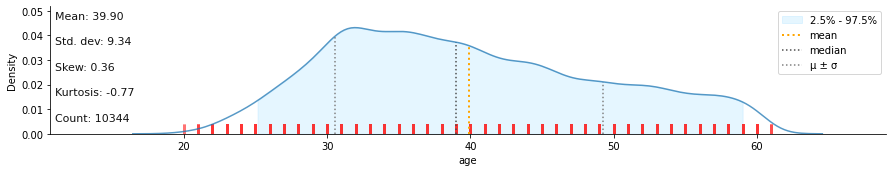

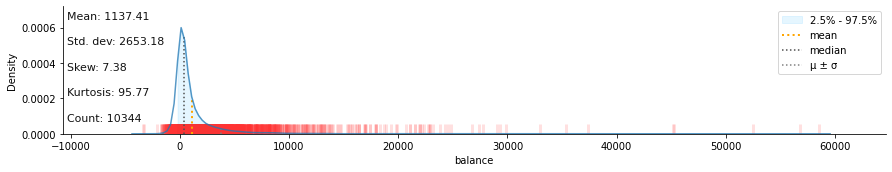

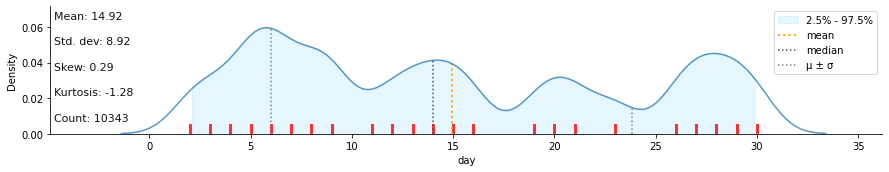

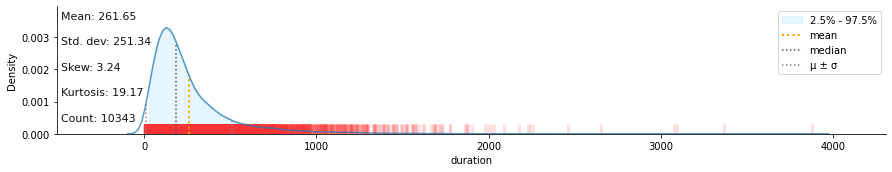

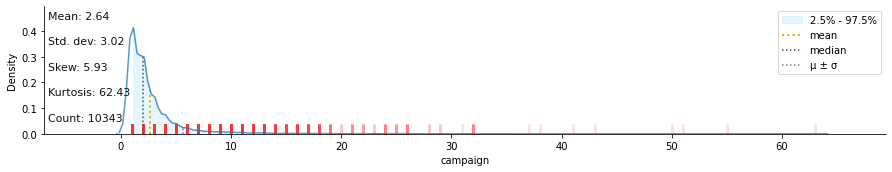

In [17]:
# distribution plot
klib.dist_plot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

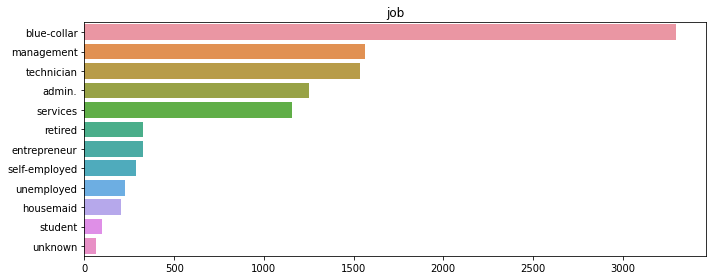

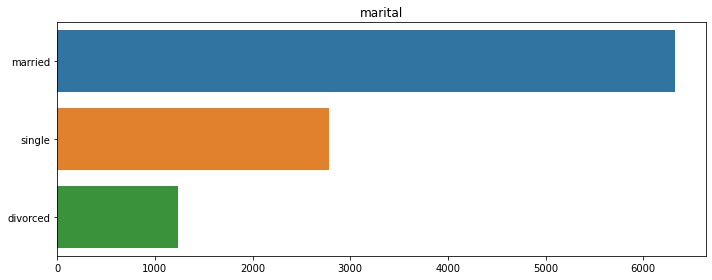

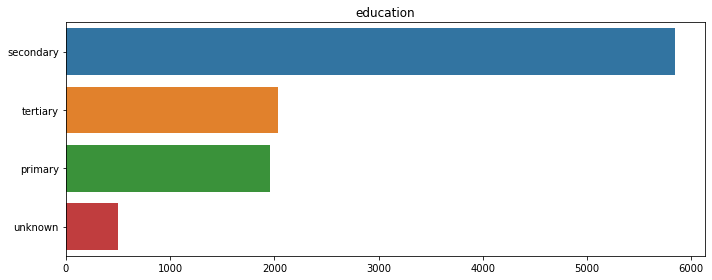

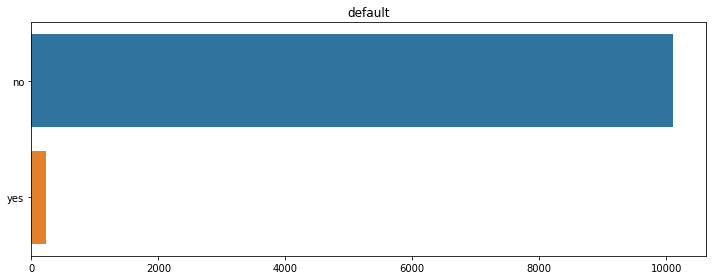

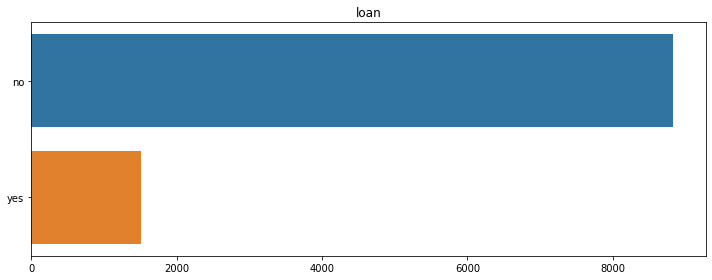

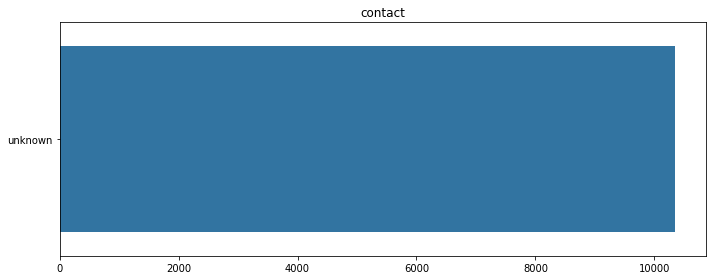

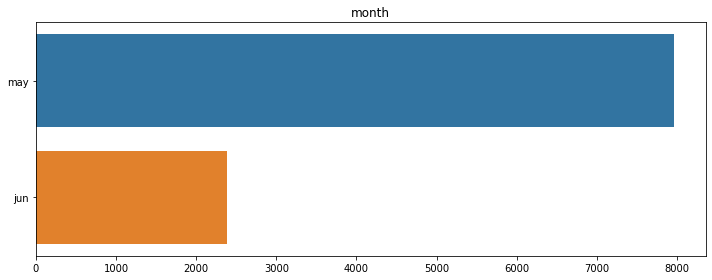

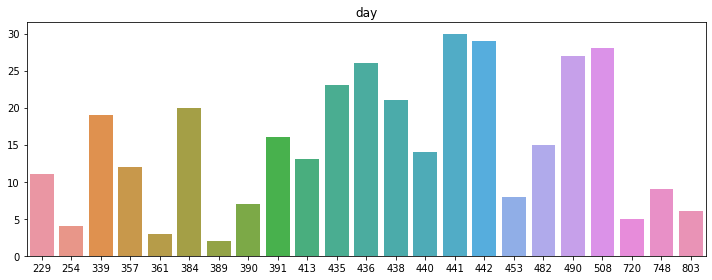

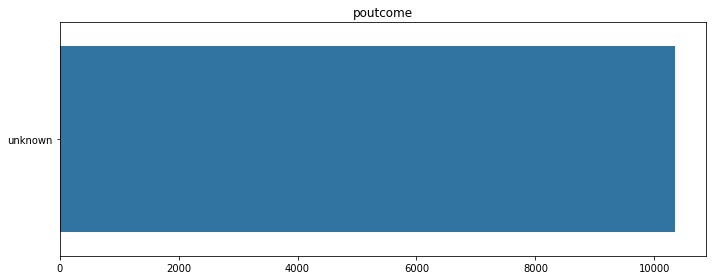

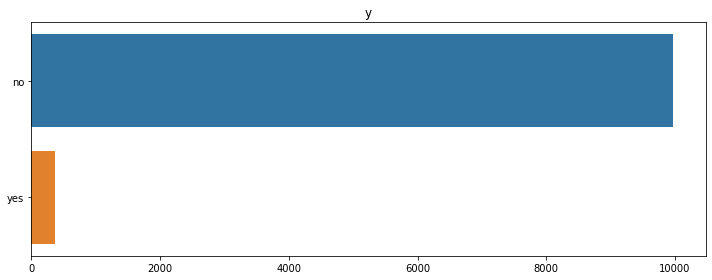

In [18]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(data[col].value_counts().values, data[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

#Analysis All Columns With Target variable

##1.Age

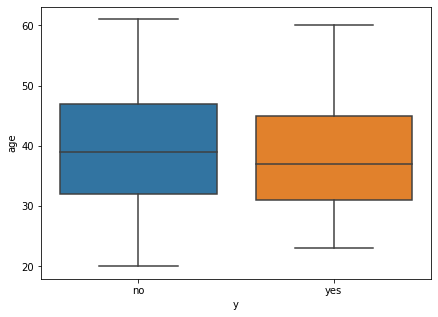

In [19]:
# Plotting the box plot 
plt.figure(figsize=(7,5))
sns.boxplot(y='age',x="y", data= data)
plt.show()

##2.Job

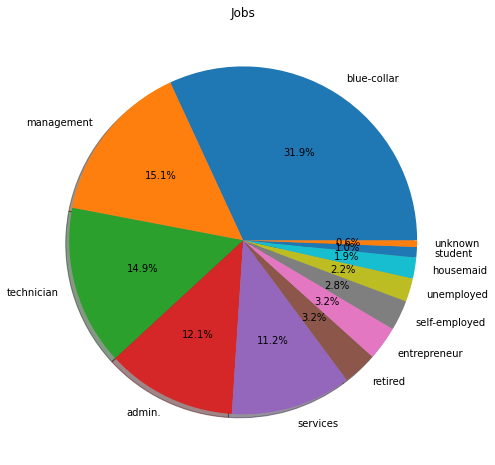

In [23]:
#pie plot of job 
plt.figure(figsize=(8,8))
plt.pie(data.job.value_counts(),labels=data.job.value_counts().index,shadow = True,autopct='%1.1f%%')
plt.title('Jobs')
plt.show()